# Kaggle Miniproject 1

## Team Members:
### Karthik Karnik 
### Kapil Sinha
### Anvita Mishra

In [123]:
import numpy as np
import matplotlib.pyplot as plt


from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import tree
from sklearn import base
from sklearn.ensemble import RandomForestClassifier

In [86]:
with open("training_data.txt") as f:
    words = f.readline().split(' ')
training_data = np.loadtxt("training_data.txt", skiprows = 1)
test_data = np.loadtxt("test_data.txt", skiprows = 1)

In [ ]:
x_train = training_data[:, 1:]
y_train = training_data[:, 0]

In [118]:
x_train = training_data[:16000, 1:]
y_train = training_data[:16000, 0]

x_val = training_data[16000:, 1:]
y_val = training_data[16000:, 0]

In [109]:
x_test = test_data

In [116]:
np.shape(x_train)


(16000, 1000)

In [95]:
np.shape(x_test)

(10000, 1000)

In [38]:
#n_words = Xtest.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(1000, ), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train, epochs=50, verbose=2)
# evaluate
#loss, acc = model.evaluate(Xtest, ytest, verbose=0)
#print('Test Accuracy: %f' % (acc*100))

Epoch 1/50
0s - loss: 0.4055 - acc: 0.8264
Epoch 2/50
0s - loss: 0.3252 - acc: 0.8638
Epoch 3/50
0s - loss: 0.2973 - acc: 0.8746
Epoch 4/50
0s - loss: 0.2690 - acc: 0.8878
Epoch 5/50
0s - loss: 0.2388 - acc: 0.8999
Epoch 6/50
1s - loss: 0.2076 - acc: 0.9189
Epoch 7/50
0s - loss: 0.1746 - acc: 0.9362
Epoch 8/50
0s - loss: 0.1423 - acc: 0.9501
Epoch 9/50
0s - loss: 0.1134 - acc: 0.9649
Epoch 10/50
0s - loss: 0.0870 - acc: 0.9775
Epoch 11/50
0s - loss: 0.0668 - acc: 0.9845
Epoch 12/50
0s - loss: 0.0499 - acc: 0.9905
Epoch 13/50
0s - loss: 0.0369 - acc: 0.9945
Epoch 14/50
0s - loss: 0.0269 - acc: 0.9969
Epoch 15/50
0s - loss: 0.0198 - acc: 0.9978
Epoch 16/50
0s - loss: 0.0140 - acc: 0.9988
Epoch 17/50
0s - loss: 0.0099 - acc: 0.9992
Epoch 18/50
0s - loss: 0.0072 - acc: 0.9997
Epoch 19/50
0s - loss: 0.0058 - acc: 0.9997
Epoch 20/50
0s - loss: 0.0057 - acc: 0.9997
Epoch 21/50
0s - loss: 0.0036 - acc: 0.9998
Epoch 22/50
0s - loss: 0.0022 - acc: 0.9999
Epoch 23/50
0s - loss: 0.0016 - acc: 0.99

In [40]:
predictions = model.predict(test_data, verbose=1)


 6880/10000 [===================>..........] - ETA: 0s

In [132]:
#boolList = predictions >= 1
lst = np.where(predictions >= 1, 1, 0)
lst = lst.flatten()
print(len(lst))

10000


In [58]:
"""
Takes in a numpy array consisting of outputs for our test set and
outputs a file in the correct submission format (as per the sample
submission file)
"""
def make_submission_file(arr, fname = "submission.txt"):
    f = open(fname, 'w')
    f.write("Id,Prediction\n")
    for i in range(len(arr)):
        f.write(str(i + 1) + "," + str(arr[i]) + '\n')
    f.close()

In [134]:
make_submission_file(lst)

In [125]:
# Random forest model

def classification_err(y, real_y):
    """
    This function returns the classification error between two equally-sized vectors of 
    labels; this is the fraction of samples for which the labels differ.
    
    Inputs:
        y: (N, ) shaped array of predicted labels
        real_y: (N, ) shaped array of true labels
    Output:
        Scalar classification error
    """
    tot_err = 0
    
    # Count how many samples the labels differ between the two vectors
    for i in range(len(y)):
        if y[i] != real_y[i]:
            tot_err += 1
    
    # Get the fraction of samples for which the labels differ
    classification_error = float(tot_err) / len(y)
    
    return classification_error
    
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    val_err = []
    
    # Use minimum leaf size parameters to create, train, and test a classifier

    # Make a new copy of the classifier, which allows us to "forget" about the
    # fitting from the previous min_leaf value
    for depth in max_depth:
        clf_copy = base.clone(clf)
        clf_copy.set_params(max_depth=depth)
        clf_copy.fit(X_train, y_train)

        train_predict = clf_copy.predict(X_train)
        test_predict = clf_copy.predict(X_test)

        train_err.append(classification_err(train_predict, y_train))
        val_err.append(classification_err(test_predict, y_test))

    return train_err, val_err



n_estimators = 100
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 31)

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, x_train, y_train, x_val, y_val)



In [137]:
x_train = training_data[:, 1:]
y_train = training_data[:, 0]
x_test = test_data

def random_forest_predict(clf, max_depth, X_train, y_train, X_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    val_err = []
    
    # Use minimum leaf size parameters to create, train, and test a classifier

    # Make a new copy of the classifier, which allows us to "forget" about the
    # fitting from the previous min_leaf value
    clf_copy = base.clone(clf)
    clf_copy.set_params(max_depth= max_depth)
    clf_copy.fit(X_train, y_train)

    train_predict = clf_copy.predict(X_train)
    test_predict = clf_copy.predict(X_test)

    train_err.append(classification_err(train_predict, y_train))

    return train_err, test_predict

train_err, test_predict = random_forest_predict(clf, 29, x_train, y_train, x_test)

print(train_err)

print(test_predict)

[0.066]
[ 1.  1.  0. ...,  0.  1.  1.]


In [138]:
test_predict.astype(int)

array([1, 1, 0, ..., 0, 1, 1])

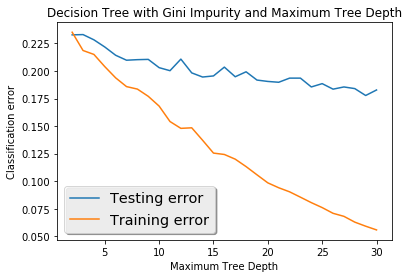

Test error minimized at max_depth = 29


In [126]:
plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Validation error')
plt.title('Decision Tree with Gini Impurity and Maximum Tree Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

In [139]:
make_submission_file(test_predict.astype(int))

In [133]:
print(len(test_predict))

10000
